In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

data = pd.read_csv("../bank.csv")

In [2]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
data_to_use = data[["age", "balance", "day", "duration", #numericas
                  "job", "marital", "education", "contact", #categoricas
                  "deposit"]] # a predecir

data_to_use.head()

,age,balance,day,duration,job,marital,education,contact,deposit
0,59,2343,5,1042,admin.,married,secondary,unknown,yes
1,56,45,5,1467,admin.,married,secondary,unknown,yes
2,41,1270,5,1389,technician,married,secondary,unknown,yes
3,55,2476,5,579,services,married,secondary,unknown,yes
4,54,184,5,673,admin.,married,tertiary,unknown,yes


OneHotEncoder - Automatizado con una función  

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Automatizamos el encodeo de las columnas categoricas
def encodeColumns (col_name, df_to_modify): 
    ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
    for col in col_name: 
        ohe_col = ohe.fit_transform(df_to_modify[[col]])
        df_to_modify = pd.concat([df_to_modify, ohe_col], axis = 1).drop(columns = [col])

    return df_to_modify


In [24]:
columns_to_encode = ["job", "marital", "education", "contact"]
parameters_df = encodeColumns(columns_to_encode, data_to_use)

parameters_df = parameters_df.drop(columns = ["deposit"])
parameters_df.head()

,age,balance,day,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,59,2343,5,1042,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Decission Tree Classifier

In [27]:
from sklearn.model_selection import train_test_split

# Preparamos los dataframes a utilizar y vemos sus shapes
X_df = parameters_df
y_df = data_to_use[["deposit"]]

print(X_df.shape)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


(11162, 26)


((8929, 26), (2233, 26), (8929, 1), (2233, 1))

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


Ahora analizamos su performance

Accuracy:  0.7089117778772951
              precision    recall  f1-score   support

          no       0.72      0.72      0.72      1166
         yes       0.70      0.69      0.69      1067

    accuracy                           0.71      2233
   macro avg       0.71      0.71      0.71      2233
weighted avg       0.71      0.71      0.71      2233



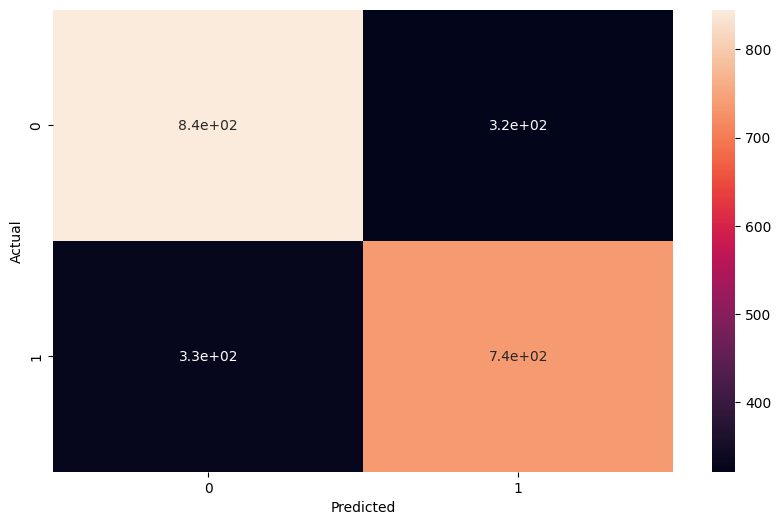

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)

fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(cm, annot = True, ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, y_pred))

Graficando las hojas del Decission Tree Classifier

In [33]:
import pydotplus
from six import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz


def dibujar_arbol(clf, c_name = None, f_name = None):

    dot_data = StringIO()

    export_graphviz(
        clf,
        out_file=dot_data,
        filled=True,
        class_names=c_name,
        feature_names=f_name,
        special_characters=True,
    )

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))


arbol = DecisionTreeClassifier(max_depth=5)
arbol.fit(X_df, y_df)

dibujar_arbol(arbol, c_name = y_df.columns, f_name = X_df.columns)

IndexError: index 1 is out of bounds for axis 0 with size 1